In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

from sklearn.metrics import classification_report, confusion_matrix


2025-12-17 23:34:48.570205: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1766014488.763959      20 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1766014488.821679      20 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

In [2]:
BASE_DIR = "/kaggle/input/stanford-car-dataset-by-classes-folder/car_data/car_data"
TRAIN_DIR = os.path.join(BASE_DIR, "train")
TEST_DIR  = os.path.join(BASE_DIR, "test")

OUT_DIR = "/kaggle/working/inceptionv3"
os.makedirs(OUT_DIR, exist_ok=True)

IMG_SIZE = (299, 299)
BATCH_SIZE = 16


In [3]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.5
)


In [4]:
train_data = train_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset="validation",
    class_mode="categorical",
    shuffle=False
)

test_data = test_gen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset="training",
    class_mode="categorical",
    shuffle=False
)

num_classes = train_data.num_classes
class_names = list(train_data.class_indices.keys())



Found 8144 images belonging to 196 classes.
Found 3977 images belonging to 196 classes.
Found 4064 images belonging to 196 classes.


Found 8144 images belonging to 196 classes.


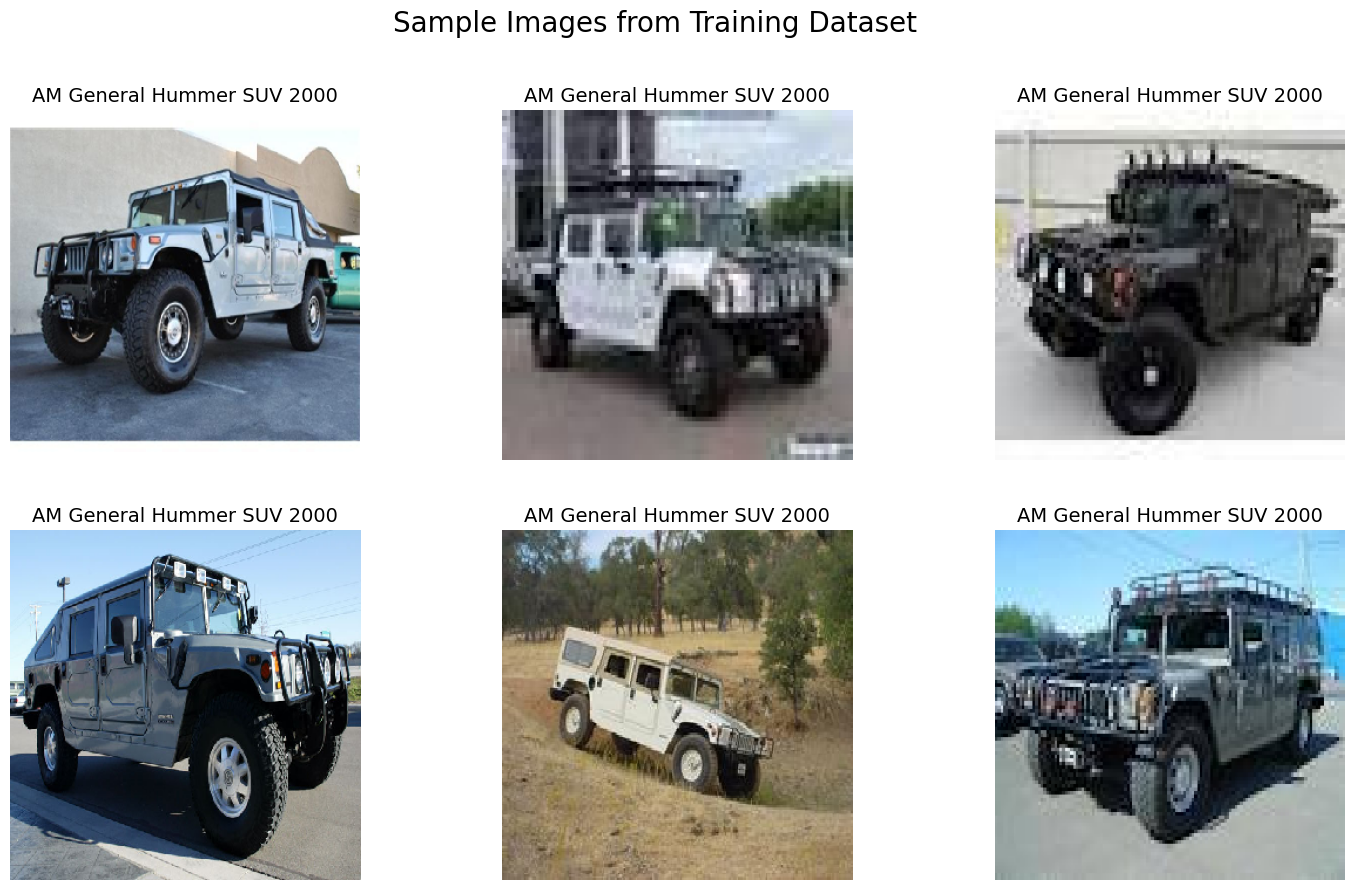

In [5]:
viz_gen = ImageDataGenerator()

viz_data = viz_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=6,
    class_mode="categorical",
    shuffle=False
)

images, labels = next(viz_data)

plt.figure(figsize=(18, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].astype("uint8"))
    class_idx = np.argmax(labels[i])
    plt.title(class_names[class_idx], fontsize=14)
    plt.axis("off")

plt.suptitle("Sample Images from Training Dataset", fontsize=20)
plt.show()

Found 8144 images belonging to 196 classes.


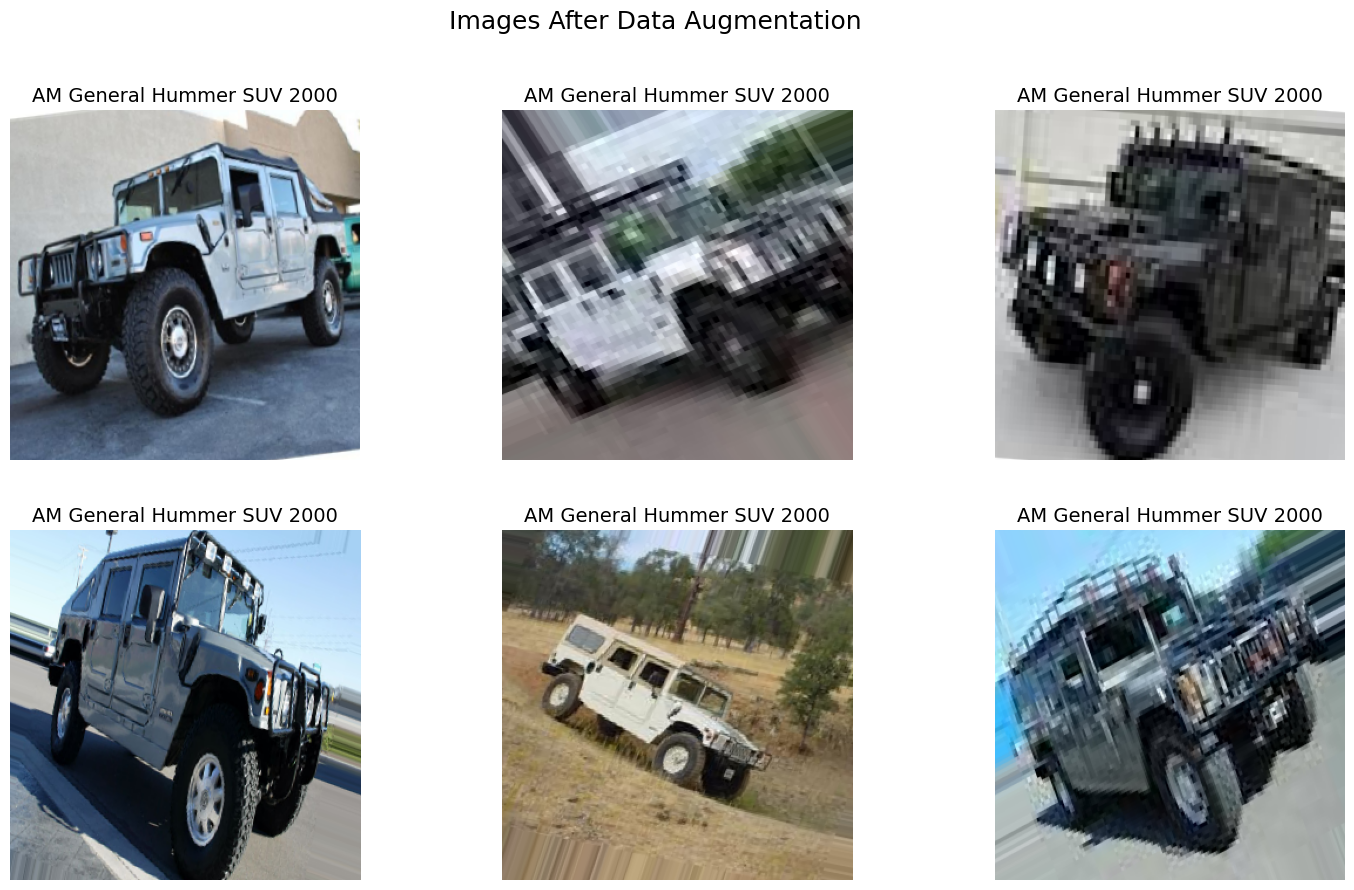

In [6]:
viz_aug_gen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

viz_aug_data = viz_aug_gen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=6,
    class_mode="categorical",
    shuffle=False
)

aug_images, aug_labels = next(viz_aug_data)

plt.figure(figsize=(18, 10))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(aug_images[i].astype("uint8"))
    class_idx = np.argmax(aug_labels[i])
    plt.title(class_names[class_idx], fontsize=14)
    plt.axis("off")

plt.suptitle("Images After Data Augmentation", fontsize=18)
plt.show()


In [7]:
base = InceptionV3(
    weights="imagenet",
    include_top=False,
    input_shape=(299, 299, 3)
)
base.trainable = False

x = GlobalAveragePooling2D()(base.output)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
out = Dense(num_classes, activation="softmax")(x)

model = Model(base.input, out)


I0000 00:00:1766014512.606980      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1766014512.607622      20 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(
    optimizer=Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15


I0000 00:00:1766014524.204106      99 service.cc:148] XLA service 0x7d8684417690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1766014524.204999      99 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1766014524.205027      99 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1766014526.047740      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/509 ━━━━━━━━━━━━━━━━━━━━ 44s 89ms/step - accuracy: 0.0000e+00 - loss: 7.2389   

I0000 00:00:1766014533.614412      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


509/509 ━━━━━━━━━━━━━━━━━━━━ 277s 513ms/step - accuracy: 0.0678 - loss: 5.3505 - val_accuracy: 0.2864 - val_loss: 2.9896
Epoch 2/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 200s 392ms/step - accuracy: 0.2922 - loss: 3.1203 - val_accuracy: 0.3505 - val_loss: 2.7581
Epoch 3/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 196s 384ms/step - accuracy: 0.3974 - loss: 2.5500 - val_accuracy: 0.3940 - val_loss: 2.6555
Epoch 4/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 196s 385ms/step - accuracy: 0.4492 - loss: 2.2104 - val_accuracy: 0.4129 - val_loss: 2.5507
Epoch 5/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 194s 381ms/step - accuracy: 0.4957 - loss: 2.0083 - val_accuracy: 0.4229 - val_loss: 2.5447
Epoch 6/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 195s 383ms/step - accuracy: 0.5263 - loss: 1.8747 - val_accuracy: 0.4340 - val_loss: 2.6045
Epoch 7/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 196s 385ms/step - accuracy: 0.5483 - loss: 1.7794 - val_accuracy: 0.4428 - val_loss: 2.5391
Epoch 8/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 192s 378ms/step - accuracy: 0.5670 - loss: 1.66

In [9]:
base.trainable = True

model.compile(
    optimizer=Adam(1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)


Epoch 1/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 282s 422ms/step - accuracy: 0.3306 - loss: 3.6953 - val_accuracy: 0.5119 - val_loss: 2.5470
Epoch 2/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 208s 408ms/step - accuracy: 0.6431 - loss: 1.4611 - val_accuracy: 0.6349 - val_loss: 1.6579
Epoch 3/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 209s 409ms/step - accuracy: 0.7642 - loss: 0.8818 - val_accuracy: 0.6505 - val_loss: 1.7066
Epoch 4/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 208s 408ms/step - accuracy: 0.8132 - loss: 0.6780 - val_accuracy: 0.7023 - val_loss: 1.4321
Epoch 5/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 211s 414ms/step - accuracy: 0.8541 - loss: 0.5167 - val_accuracy: 0.7252 - val_loss: 1.3055
Epoch 6/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 212s 416ms/step - accuracy: 0.8836 - loss: 0.4012 - val_accuracy: 0.7264 - val_loss: 1.3315
Epoch 7/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 212s 416ms/step - accuracy: 0.8909 - loss: 0.3804 - val_accuracy: 0.7113 - val_loss: 1.4135
Epoch 8/15
509/509 ━━━━━━━━━━━━━━━━━━━━ 212s 416ms/step - accuracy: 0.8872 -

In [10]:
checkpoint = ModelCheckpoint(
    os.path.join(OUT_DIR, "best.keras"),
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=6,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

model.compile(
    optimizer=Adam(1e-5),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint, early_stop, reduce_lr]
)


Epoch 1/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9556 - loss: 0.1420
Epoch 1: val_accuracy improved from -inf to 0.83279, saving model to /kaggle/working/inceptionv3/best.keras
509/509 ━━━━━━━━━━━━━━━━━━━━ 277s 431ms/step - accuracy: 0.9556 - loss: 0.1420 - val_accuracy: 0.8328 - val_loss: 0.8330 - learning_rate: 1.0000e-05
Epoch 2/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.9756 - loss: 0.0784
Epoch 2: val_accuracy improved from 0.83279 to 0.84360, saving model to /kaggle/working/inceptionv3/best.keras
509/509 ━━━━━━━━━━━━━━━━━━━━ 213s 418ms/step - accuracy: 0.9756 - loss: 0.0784 - val_accuracy: 0.8436 - val_loss: 0.7811 - learning_rate: 1.0000e-05
Epoch 3/20
509/509 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.9807 - loss: 0.0638
Epoch 3: val_accuracy improved from 0.84360 to 0.84813, saving model to /kaggle/working/inceptionv3/best.keras
509/509 ━━━━━━━━━━━━━━━━━━━━ 213s 417ms/step - accuracy: 0.9807 - loss: 0.0638 - val_accuracy: 0.8481 - val_

In [11]:
model.load_weights(os.path.join(OUT_DIR, "best.keras"))

preds = model.predict(test_data)
y_pred = np.argmax(preds, axis=1)
y_true = test_data.classes

print("InceptionV3 Test Accuracy:", np.mean(y_pred == y_true))
print(classification_report(y_true, y_pred, target_names=class_names))

254/254 ━━━━━━━━━━━━━━━━━━━━ 47s 166ms/step
InceptionV3 Test Accuracy: 0.8658956692913385
                                                        precision    recall  f1-score   support

                            AM General Hummer SUV 2000       0.86      0.86      0.86        22
                             Acura Integra Type R 2001       0.80      0.91      0.85        22
                                   Acura RL Sedan 2012       0.65      0.81      0.72        16
                                   Acura TL Sedan 2012       0.75      0.95      0.84        22
                                  Acura TL Type-S 2008       0.95      0.90      0.93        21
                                  Acura TSX Sedan 2012       0.81      0.65      0.72        20
                              Acura ZDX Hatchback 2012       0.93      0.70      0.80        20
              Aston Martin V8 Vantage Convertible 2012       0.75      0.78      0.77        23
                    Aston Martin V8 Vantage C

In [12]:
top1 = []
top3 = []

for i in range(len(preds)):
    order = np.argsort(preds[i])[::-1]
    top1.append(order[0] == y_true[i])
    top3.append(y_true[i] in order[:3])

print("Top-1 Accuracy:", np.mean(top1))
print("Top-3 Accuracy:", np.mean(top3))


Top-1 Accuracy: 0.8658956692913385
Top-3 Accuracy: 0.9596456692913385


In [13]:
confused = {}

for t, p in zip(y_true, y_pred):
    if t != p:
        confused[(t, p)] = confused.get((t, p), 0) + 1

top_confused = sorted(confused.items(), key=lambda x: x[1], reverse=True)[:10]

for (t, p), count in top_confused:
    print(f"{class_names[t]} → {class_names[p]} : {count}")


Dodge Sprinter Cargo Van 2009 → Mercedes-Benz Sprinter Van 2012 : 8
Audi V8 Sedan 1994 → Audi 100 Sedan 1994 : 7
BMW 6 Series Convertible 2007 → BMW M6 Convertible 2010 : 7
Chevrolet Express Van 2007 → GMC Savana Van 2012 : 7
Audi TT Hatchback 2011 → Audi TTS Coupe 2012 : 6
Chevrolet Express Cargo Van 2007 → Chevrolet Express Van 2007 : 6
Chevrolet Express Van 2007 → Chevrolet Express Cargo Van 2007 : 6
Audi S5 Coupe 2012 → Audi A5 Coupe 2012 : 5
Audi TTS Coupe 2012 → Audi TT Hatchback 2011 : 5
Dodge Caliber Wagon 2012 → Dodge Caliber Wagon 2007 : 5
